In [2]:
import polars as pl
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
pd = pl.read_csv("merged3_with_year_built.csv")

pd

LSOA,Year_built,Energy Efficiency,Borough,LSOA 2011 Name,LA Name,2012,2013,2014,2015,2016,2017,LAD Code,Total Mean Annual Household Income estimate,Total Median Annual Household Income estimate
str,i64,f64,str,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64
"""E01000907""",1982,65.971781,"""Camden""","""Camden 001A""","""Camden""",7.0,10.7,17.6,10.1,8.0,9.3,"""E09000007""",39985.0,30223.0
"""E01000908""",1929,60.554688,"""Camden""","""Camden 001B""","""Camden""",13.1,8.4,11.6,8.5,8.0,12.1,"""E09000007""",42394.0,32049.0
"""E01000909""",1929,57.196262,"""Camden""","""Camden 001C""","""Camden""",10.5,10.0,14.4,7.0,9.6,10.0,"""E09000007""",77370.0,58469.0
"""E01000912""",1900,64.343598,"""Camden""","""Camden 001D""","""Camden""",8.6,12.0,18.1,9.1,7.6,10.8,"""E09000007""",41737.0,31551.0
"""E01000913""",1900,54.34749,"""Camden""","""Camden 001E""","""Camden""",11.6,10.8,13.8,13.4,11.9,8.9,"""E09000007""",96649.0,73024.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""E01004328""",1900,60.37883,"""Waltham Forest""","""Waltham Forest 028B""","""Waltham Forest""",15.0,7.1,8.0,5.4,6.5,9.2,"""E09000031""",35125.0,28402.0
"""E01004329""",1900,57.851955,"""Waltham Forest""","""Waltham Forest 028C""","""Waltham Forest""",18.4,9.0,8.3,6.1,6.2,10.6,"""E09000031""",33251.0,26907.0
"""E01004330""",1900,56.804714,"""Waltham Forest""","""Waltham Forest 028D""","""Waltham Forest""",15.8,10.0,10.1,8.6,11.3,9.8,"""E09000031""",37154.0,30026.0


In [6]:
x = pd["Year_built"].to_numpy().reshape(-1, 1)  # X should be a 2D array
y = pd["Total Median Annual Household Income estimate"].to_numpy()  # y is a 1D array

# Perform linear regression using sklearn
model = LinearRegression()
model.fit(x, y)

# Print regression results
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Use the model to make predictions
predictions = model.predict(x)
print("Predictions:", predictions)

model

correlation_matrix = np.corrcoef(pd["Year_built"].to_numpy(), pd["Total Median Annual Household Income estimate"].to_numpy())
pearson_coefficient = correlation_matrix[0, 1]
print("Pearson Correlation Coefficient (r):", pearson_coefficient)

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y, predictions)
print("R² (Coefficient of Determination):", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)
print("Mean Squared Error (MSE):", mse)

Intercept: 202054.02959663924
Coefficient: -85.87801821569015
Predictions: [31843.79749314 36395.33245857 36395.33245857 ... 38885.79498683
 38885.79498683 38885.79498683]
Pearson Correlation Coefficient (r): -0.25131970130035053
R² (Coefficient of Determination): 0.0631615922616976
Mean Squared Error (MSE): 123008798.8992728


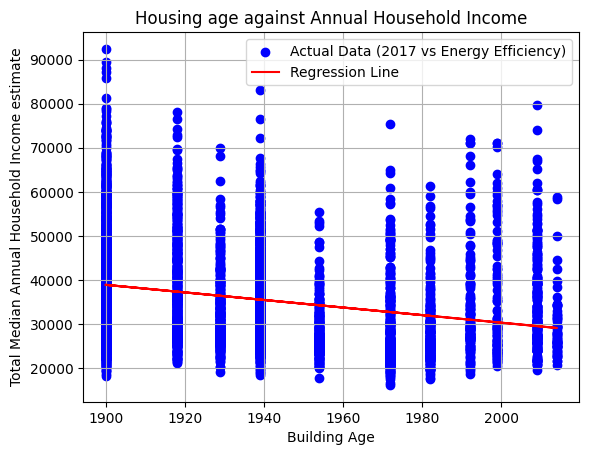

In [8]:
plt.scatter(x, y, color="blue", label="Actual Data (2017 vs Energy Efficiency)")
plt.plot(x, predictions, color="red", label="Regression Line")

# Add labels, title, and legend to the plot
plt.xlabel("Building Age")
plt.ylabel("Total Median Annual Household Income estimate")
plt.title("Housing age against Annual Household Income")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()